In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL.Image as Image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
IMAGE_SHAPE, IMAGE_SHAPE+(3,)

((224, 224), (224, 224, 3))

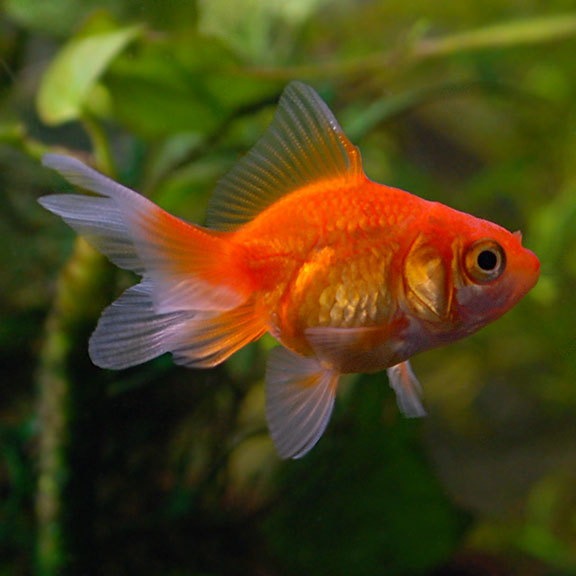

In [9]:
Image.open('goldfish.jpg')

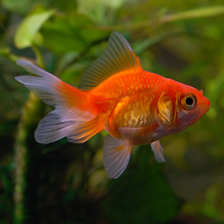

In [30]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [31]:
gold_fish= np.array(gold_fish)/ 255.0
gold_fish.shape

(224, 224, 3)

In [32]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [33]:
result=classifier.predict(gold_fish[np.newaxis, ...])
result

array([[ 0.22107837,  2.0497704 ,  9.622821  , ..., -1.4619302 ,
        -0.28231004, -0.2591613 ]], dtype=float32)

In [24]:
result.shape

(1, 1001)

In [34]:
predicted_label_index= np.argmax(result)
predicted_label_index

2

In [27]:
image_labels = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/18_transfer_learning/ImageNetLabels.txt',header = None)
image_labels = image_labels.values.tolist() #numpy array --> to list ->list2d
image_labels = list(np.concatenate(image_labels).flat) #2D to 1D list
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [35]:
predicted_label_index, image_labels[predicted_label_index]

(2, 'goldfish')

### Flower Dataset

In [36]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

228827136/228813984 [==============================] - 2s 0us/step


In [37]:
data_dir

'./datasets/flower_photos'

In [38]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [39]:
image_count= len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [40]:
roses= list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3074406590_91c697c805_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg')]

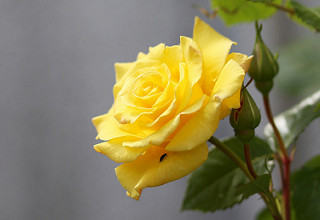

In [41]:
PIL.Image.open(str(roses[0]))

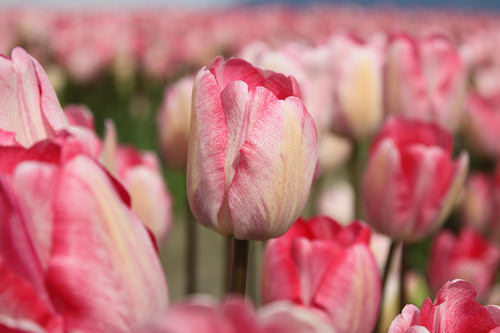

In [42]:
tulips= list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(str(tulips[0]))

In [43]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [44]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg')

In [45]:
flowers_labels_dict = {   #assigning class numbers randomly
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

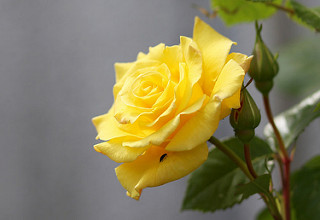

In [46]:
img= cv2.imread(str(flowers_images_dict['roses'][0]))
img


from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [49]:
cv2.resize(img, (224,224)).shape

(224, 224, 3)

In [50]:
x,y=[],[]

for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

  for img in images:
    img= cv2.imread(str(img))
    resized_img= cv2.resize(img, (224,224))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


[0, 0, 0, 0, 0]


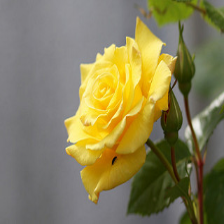

In [51]:
print(y[:5])
cv2_imshow(x[0])

In [52]:
x=np.array(x)
y=np.array(y)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [54]:
len(x_train)

2752

In [55]:
x_train= x_train/255
x_test= x_test/255

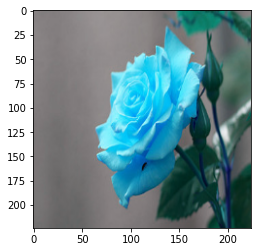

In [57]:
plt.imshow(x[0])

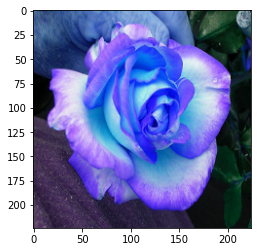

In [59]:
plt.imshow(x[1])

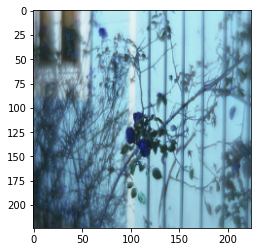

In [60]:
plt.imshow(x[2])

In [63]:
pred= classifier.predict(np.array([x[0],x[1],x[2]]))
pred= np.argmax(pred, axis=1) #NOT COLUMNS use 1
pred

array([795, 795, 795])

In [64]:
image_labels[795]

'shower curtain'

**all layers excluding the last layer**

In [65]:
# feature_extractor_model = '"https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"'
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"   #Note Difference

pretrained_mode_except_top_layer= hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False  #false means dont train== FREEZE
)

In [66]:
num_flowers=5

#creating only last layer
model= keras.Sequential([
          pretrained_mode_except_top_layer, 
          tf.keras.layers.Dense(num_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [68]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 12s 81ms/step - loss: 0.8181 - accuracy: 0.7042
Epoch 2/5
86/86 [==============================] - 7s 81ms/step - loss: 0.4127 - accuracy: 0.8626
Epoch 3/5
86/86 [==============================] - 7s 80ms/step - loss: 0.3233 - accuracy: 0.8935
Epoch 4/5
86/86 [==============================] - 7s 81ms/step - loss: 0.2698 - accuracy: 0.9197
Epoch 5/5
86/86 [==============================] - 7s 81ms/step - loss: 0.2270 - accuracy: 0.9390


In [69]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 3s 95ms/step - loss: 0.3788 - accuracy: 0.8649


[0.378785103559494, 0.8649237751960754]